# Simulation du jeux de LIDO simplifié
## Selma akkari
2lm2

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [1]:
import numpy as np

### Simulation du lancé de dé

In [2]:
def Roll():
    return int(np.random.choice(range(1,7),1))


la fontion donne une valeur aleatoire entre 1 et 6

In [3]:
Roll()

3

### Compléter le code et commenter

In [4]:
A=0
NA=0
S=10
temp=Roll()
NA+=1
print(NA,temp)
while temp!=6:
    temp=Roll()
    NA+=1
    print(NA,temp)
A=1
print('sortie de la prison apres {} coups'.format(NA))
print(NA,A,temp)
while(A!=S):
    temp=Roll()
    if(temp+A<S):
        NA+=1
        A+=temp
        print(NA,temp,A)
    elif(temp+A>S):
        NA+=1
        print(NA,temp,A)
    else:
        A=S
        NA+=1
        print(NA,temp,A)
        break

1 1
2 2
3 5
4 5
5 1
6 3
7 5
8 5
9 5
10 4
11 3
12 4
13 5
14 5
15 5
16 1
17 4
18 4
19 5
20 6
sortie de la prison apres 20 coups
20 1 6
21 4 5
22 5 10


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [5]:
def sim(S):
    A=0
    NA=0
    
    temp=Roll()
    NA+=1
    while temp!=6:
        temp=Roll()
        NA+=1
    
    A=1

    while(A!=S):
        temp=Roll()
        if(temp+A<S):
            NA+=1
            A+=temp
        
        elif(temp+A>S):
            NA+=1
        
        else:
            A=S
            NA+=1
    return NA
 

In [6]:
sim(40)

12

## les etapes de la fonctions prcedentes :


* initialiser la position dans le sible 
* 1er simulation pour voir si on avoir 6 ou non pour sortir et commencer a deplaccer dans le sible
* initialiser le nombe dess essais a 0
* cette boucle se repete jusqua ce que temp =16
* on obtient 6 donc on incrimente la pos a 1
*  cette boucle se repete jusqua ce que a devient egale au nombre k initialiser
* si temp+A>k on va sortir ddu valeur k  maximale donc on ne fait rien juste on incremente le nombre  des essais 

### Simulation de $10^5$  scénario 

In [7]:
L=[sim(30) for i in range(10000)]
Moy=sum(L)/10000
print('estimation de la moyenne de X_30{}'.format(Moy))

estimation de la moyenne de X_3019.0349


In [8]:
x=list(range(10,29))
x
y=[sum([sim(u) for i in range(10000)])/10000 for u in x ]

In [9]:
import matplotlib.pyplot as plt

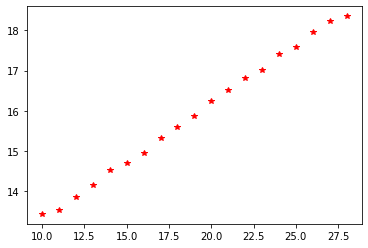

In [10]:
plt.plot(x,y,'*r')
plt.show()

In [11]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [12]:
slope

0.28650333333333333

In [13]:
intercept


10.457005087719294

In [14]:
yy=[slope *u + intercept for u in x ]

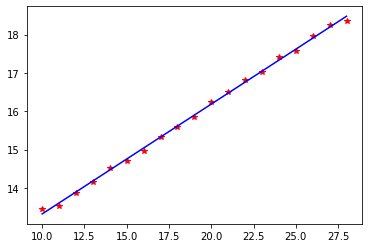

In [15]:
plt.plot(x,y,'*r',x,yy,'-b')

E(x_n)=0.28*n+10.5

on remarque que on obtient une droite affine d'eq E(x)=ax+b telque b est intercept et a est slope